In [32]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import skimage.io as io
import skimage.filters as flt
%matplotlib inline
import numpy as np
import scipy.ndimage.filters as flt
import warnings
from PIL import Image
import copy

In [33]:
def anisodiff(img,niter=200,kappa=10,gamma=0.1):

    img = img.astype('float32')
    imgout = img.copy()

    deltaS = np.zeros_like(imgout)
    deltaE = deltaS.copy()
    NS = deltaS.copy()
    EW = deltaS.copy()
    gS = np.ones_like(imgout)
    gE = gS.copy()

    for ii in np.arange(1,niter):

        deltaS[:-1,: ] = np.diff(imgout,axis=0)
        deltaE[: ,:-1] = np.diff(imgout,axis=1)

        deltaSf=deltaS;
        deltaEf=deltaE;

        gS = np.exp(-(deltaSf/kappa)**2.)
        gE = np.exp(-(deltaEf/kappa)**2.)
    
        E = gE*deltaE
        S = gS*deltaS

        NS[:] = S
        EW[:] = E
        NS[1:,:] -= S[:-1,:]
        EW[:,1:] -= E[:,:-1]

        # update the image
        imgout += gamma*(NS+EW)

    return imgout


In [34]:
def colorful_diffusion(img,niter=400,kappa=10,gamma=0.1):
    result = copy.deepcopy(img)
    row = len(img)
    column = len(img[0])
    image_r = img[0:row, 0:column, 0]
    image_g = img[0:row, 0:column, 1]
    image_b = img[0:row, 0:column, 2]
    for i in range(1):
        image_r=anisodiff(image_r, niter, kappa, gamma)
        image_g=anisodiff(image_g, niter, kappa, gamma)
        image_b=anisodiff(image_b, niter, kappa, gamma)
    for i in range(len(img)):
        for j in range(len(img[0])):
            result[i][j][0] = image_r[i][j]
            result[i][j][1] = image_g[i][j]
            #result[i][j][1] = img[i][j][1]
            result[i][j][2] = image_b[i][j]
            #result[i][j][2] = 255
    return result

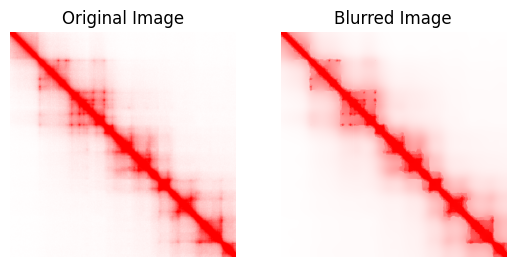

In [35]:
valid_image = 0
while valid_image == 0:
    img_name = "hic_example3.png"
    try:
        img = Image.open(img_name)
        valid_image = 1
    except:
        print("wrong input")
original_image = np.asarray(img)
blurred_image_array = colorful_diffusion(original_image)

#save the blurred image
blurred_image = Image.fromarray(blurred_image_array)
if img_name[-3:] == "png":
    blurred_image.save("blurred_image.png")
else:
    blurred_image.save("blurred_image.jpg")

#print the original image and the result image
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(blurred_image)
plt.title('Blurred Image')
plt.axis('off')

plt.show()

In [ ]:
#musch loop
#set up clustter